# AIChampionsHub : Academy

### Module 2: Adapting AI for Enterprise Use : Retrival Augmented Generation

### Use Case 04B : Chucking of Data before storing in a Vector Database
This is part of Course by **AIChampionsHub** - AI Fundamentals and AI Engineering Courses leverage this Notebook.

---
<a href="https://github.com/aichampionslearn/01_LLM_Basics"><img src="https://img.shields.io/badge/GitHub%20Repository-black?logo=github"></a>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/aichampionslearn/01_LLM_Basics/blob/main/AICH_L2_AIAgents_M1_D3_BasicLLMAppv01.ipynb)

### There are various Chunking Strategies. We will explore three in this lesson

In [1]:
%pip install --quiet --upgrade langchain langchain-openai langchain-text-splitters langchain-community

Note: you may need to restart the kernel to use updated packages.


# DataSet
- First we will use simple Datasets. One of Paulgraham's essay
- https://paulgraham.com/mit.html

# Step 1 : Simple Code : Character level

In [1]:
text = """
First we will use simple Datasets. One of Paulgraham's essay to demonstrate chunking.

This essay is about Startups.

Many Students are interested in starting on their own soon after college.
"""

def getChunks(text, chunk_size):

    chunks = []

    # This can be optimized but using for illustration
    chunk_positions = range(0,len(text), chunk_size)
    print("These are your Chunk Positions : ", chunk_positions)

    for i in range(0,len(text), chunk_size):
        chunk = text[i:i+chunk_size]
        chunks.append(chunk)
    return chunks

In [2]:
CHUNK_SIZE = 20
chunks = getChunks(text, CHUNK_SIZE) #Split at every 10 characters
chunks

These are your Chunk Positions :  range(0, 193, 20)


['\nFirst we will use s',
 'imple Datasets. One ',
 "of Paulgraham's essa",
 'y to demonstrate chu',
 'nking.\n\nThis essay i',
 's about Startups.\n\nM',
 'any Students are int',
 'erested in starting ',
 'on their own soon af',
 'ter college.\n']

# Document Object
- String used above is for illustration.
- Langchain provides a "Document" object and "Loaders" for variety of Document types (like PDF, Txt). We will use the Document Class

In [4]:
from langchain.text_splitter import CharacterTextSplitter
# Parameters : Seperator and Overlap between Chunks
CHUNK_SIZE
text_splitter = CharacterTextSplitter(
                chunk_size=CHUNK_SIZE, chunk_overlap=0,
                separator='', strip_whitespace=False)

In [5]:
text_splitter.create_documents([text])

#Note: Play with Overlap parameter and observe overlaps. Or even Seperator.

[Document(metadata={}, page_content='\nFirst we will use s'),
 Document(metadata={}, page_content='imple Datasets. One '),
 Document(metadata={}, page_content="of Paulgraham's essa"),
 Document(metadata={}, page_content='y to demonstrate chu'),
 Document(metadata={}, page_content='nking.\n\nThis essay i'),
 Document(metadata={}, page_content='s about Startups.\n\nM'),
 Document(metadata={}, page_content='any Students are int'),
 Document(metadata={}, page_content='erested in starting '),
 Document(metadata={}, page_content='on their own soon af'),
 Document(metadata={}, page_content='ter college.\n')]

# Step 2 : Recursive Charecter Splitter
- Problem with Step1: Used very simple or naive approach of split using fixed number of characters.
- Many times we need to split considering nature of document (paragraphs or other types of seperators).
- The 'RecursiveCharacterText Splitter' factors a number of seperators to be used e.g. "\n\n" for say paragraph breaks, "\n" New Lines, " " spaces etc.

Look at the documentation of Langchain to know about seperators [here](https://python.langchain.com/docs/modules/data_connection/document_transformers/text_splitters/code_splitter)

###Observations :
- Notice the overall split being more cleaner.
- e.g. Sentences split at Periods

In [6]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
CHUNK_SIZE = 50
text_splitter = RecursiveCharacterTextSplitter(chunk_size=CHUNK_SIZE, chunk_overlap=0)
text_splitter.create_documents([text])

[Document(metadata={}, page_content='First we will use simple Datasets. One of'),
 Document(metadata={}, page_content="Paulgraham's essay to demonstrate chunking."),
 Document(metadata={}, page_content='This essay is about Startups.'),
 Document(metadata={}, page_content='Many Students are interested in starting on their'),
 Document(metadata={}, page_content='own soon after college.')]

# Other Splitters
- Input content or Documents can be in many different formats like Markdown or PDF etc. Langchain provides splitters for many types. Please refer to the documentation and leverag depending on your need.


## Semantic Chunking
- Splitting Text based on Context and Meaning.
  All information relevant to a "topic" is in one Chunk.
  Here we will use NLP for meaning and then group text / content into Coherent Unit Based on Meaning.
- Key Steps:
  - A) Load the Document or Content
  - B) Tokenize - e.g. use Sentence Tokenizer to split text (or Paragraph or document) into Sentences.
  - C) Embeddings: Allow us to represent text in Numeric and optimal manner


In [7]:
# Step 2 : Recursive Charecter Splitter
with open('./billionaireBuild.txt') as file:
    pg_essay = file.read()


In [8]:
import re
def paragraph_to_sentences_Splitter(paragraph):

    # Here we will split the Paragraph into sentenences based on Period.
    sentences = re.split(r'(?<=[.])\s+', paragraph)
    print (f"Number of Sentences : {len(sentences)} ")

    #Conver this to a dictionary for easy use
    sentences = [{'index':i, 'sentence':s} for i, s in enumerate(sentences)]
    return sentences

In [9]:
sentences = paragraph_to_sentences_Splitter(pg_essay)
sentences[2] #Example

Number of Sentences : 183 


{'index': 2,
 'sentence': "There has been so much nonsense written about this topic that I've been meaning for years to write something telling founders the truth."}

## Let us Embed the Documents

In [14]:
# We will embed each Sentence and add to the same dictonary for use
# from google.colab import userdata
from dotenv import load_dotenv
import os
load_dotenv()
OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")
# print(OPENAI_API_KEY)
# OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

from langchain.embeddings import OpenAIEmbeddings
embed_model = OpenAIEmbeddings(api_key = OPENAI_API_KEY)

embeddings= embed_model.embed_documents([s['sentence'] for s in sentences])

# Also add these embeddings to the dictionary of document
# len(embeddings)
for i, sentence in enumerate(sentences):
    sentence['sentence_embeddings'] = embeddings[i]

## We can use Cosine Similarty find if two sentences to close to each other or so.

In [15]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [44]:
import numpy as np
np_embeddings = np.array(embeddings) # For Cosine Similarity - 2D Array
np_embeddings = np.reshape(np_embeddings,(1, np_embeddings.size))
type(sentence), type(embeddings), type(np_embeddings)

(dict, list, numpy.ndarray)

In [45]:
np_embeddings.shape

(1, 281088)

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['sentence_embeddings']
        embedding_next = sentences[i + 1]['sentence_embeddings']
        
        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        
        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [48]:
distances, sentences = calculate_cosine_distances(sentences)

In [50]:
distances[:5]

[np.float64(0.2489967442710841),
 np.float64(0.220791782971977),
 np.float64(0.20601198303875856),
 np.float64(0.21958230309007465),
 np.float64(0.293965945438906)]

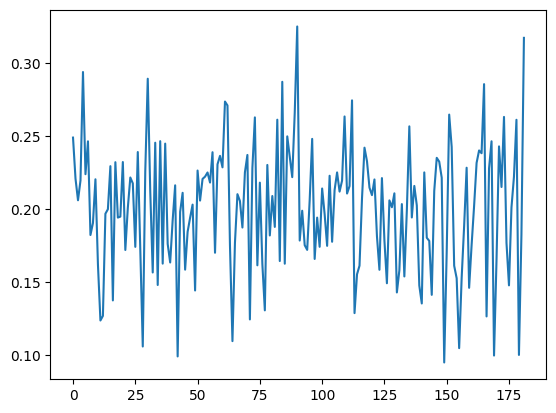

In [52]:
import matplotlib.pyplot as plt

plt.plot(distances); #Distances shown in Y..X axis is sentence numbers

In [54]:
# Initialize the start index
start_index = 0
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff

indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)
    
    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences


In [55]:
for i, chunk in enumerate(chunks[:2]):
    buffer = 200
    
    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")


Chunk #0
December 2020
As I was deciding what to write about next, I was surprised to find that two separate essays I'd been planning to write were actually the same. The first is about how to ace your Y Combi
...
second is about something politicians sometimes say — that the only way to become a billionaire is by exploiting people — and why this is mistaken. Keep reading, and you'll learn both simultaneously.


Chunk #1
I know the politicians are mistaken because it was my job to predict which people will become billionaires. I think I can truthfully say that I know as much about how to do this as anyone. If the key
...
trying to figure out: is there a path to a huge market? [1]

Sometimes it's obvious there will be a huge market. If Boom manages to ship an airliner at all, international airlines will have to buy it.




In [66]:
# We will iterate through the sentences, compare the similarity between adjacent sentences.
# If the similarity score is at a certain cut-off then we can combine them into same chunk
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff

semantic_chunks = []
# for i, sentence in enumerate(sentences):
for i in range(len(sentences)):
   
    if i == 0:
        semantic_chunks.append(sentences[i])
        sentence['similarity_score'] = 0.5
    elif i > 0:
        embedding_prev = np.array(sentences[i-1]['sentence_embeddings']).reshape(1, -1) 
        embedding_current = np.array(sentences[i]['sentence_embeddings']).reshape(1, -1)
        
        similarity_score = cosine_similarity(embedding_prev, embedding_current)
        distance = 1 - similarity_score
        sentence['distance'] = distance
       
        if similarity_score[0][0] > 0.8: #You can choose cut-off as required for your use case
            semantic_chunks[-1].append(sentences[i]) # Append to previous
            print("Combined")
        else:
            semantic_chunks.append([sentence])
            print("New Chunk")

New Chunk
New Chunk
New Chunk
New Chunk
New Chunk
New Chunk
New Chunk
Combined
Combined
New Chunk
Combined
Combined
Combined
Combined
Combined
New Chunk
Combined
New Chunk
Combined
Combined
New Chunk
Combined
New Chunk
New Chunk
New Chunk
Combined
New Chunk
Combined
Combined
New Chunk
New Chunk
New Chunk
Combined
New Chunk
Combined
New Chunk
Combined
New Chunk
Combined
Combined
Combined
New Chunk
Combined
Combined
New Chunk
Combined
Combined
Combined
New Chunk
Combined
New Chunk
New Chunk
New Chunk
New Chunk
New Chunk
New Chunk
New Chunk
Combined
New Chunk
New Chunk
New Chunk
New Chunk
New Chunk
Combined
Combined
Combined
New Chunk
New Chunk
Combined
New Chunk
New Chunk
Combined
New Chunk
New Chunk
Combined
New Chunk
Combined
Combined
New Chunk
Combined
New Chunk
Combined
New Chunk
Combined
New Chunk
Combined
New Chunk
New Chunk
New Chunk
New Chunk
New Chunk
Combined
Combined
Combined
Combined
New Chunk
New Chunk
Combined
Combined
Combined
New Chunk
Combined
Combined
New Chunk
Combined

In [ ]:
semantic_chunks

[{'index': 0,
  'sentence': "December 2020\nAs I was deciding what to write about next, I was surprised to find that two separate essays I'd been planning to write were actually the same.",
  'sentence_embeddings': [-0.01605968535351948,
   -0.019710190416289897,
   0.008562208076023974,
   -0.010241693724636373,
   -0.0012469388199178718,
   0.008885429160562293,
   -0.019139798185324772,
   -0.027454836046244508,
   -0.008137582727831657,
   -0.02154811638515608,
   0.0261619498454461,
   0.032043318906282314,
   -0.001690576536222745,
   -0.016934284787511193,
   -8.620237271725302e-05,
   0.015983633552762833,
   0.03029411817565375,
   0.002043902389883137,
   -0.012459881491253495,
   -0.007250307528052552,
   -0.014906226522785691,
   -0.009512860242094901,
   -0.005193729838043308,
   -0.001349134009261221,
   -0.0063471882031158125,
   -0.005567653054408625,
   0.014944253354486582,
   -0.023081837013640805,
   0.0056658870960472445,
   0.001553524155117278,
   -0.008156595678

In [63]:
for i, chunk in enumerate(semantic_chunks[:2]):
    buffer = 200
    
    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0


KeyError: slice(None, 200, None)